In [1]:
import pandas as pd
from pylab import plot, show, legend, boxplot
import seaborn as sns
from pylab import title, xlabel, ylabel, axis, savefig, tight_layout, hist, boxplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import sympy as sp

In [2]:
df = pd.read_csv('income2wam.csv', sep = ';')


In [3]:
df.head()

,age,edu_non_grad,edu_hs_grad,edu_uni_col_uni_grad,edu_prof_or_phd_grad,wage_per_hour,marital_status,race,sex,member_of_labor_union
0,15,1,0,0,0,435,0,0,1,0
1,15,1,0,0,0,300,0,0,1,0
2,15,1,0,0,0,200,0,0,1,0
3,15,1,0,0,0,500,0,0,0,0
4,15,1,0,0,0,425,0,0,0,0


In [4]:
df.dtypes

age                      int64
edu_non_grad             int64
edu_hs_grad              int64
edu_uni_col_uni_grad     int64
edu_prof_or_phd_grad     int64
wage_per_hour            int64
marital_status           int64
race                     int64
sex                      int64
member_of_labor_union    int64
dtype: object

## Zmienna objaśniana

In [5]:
sns.set_style(style="darkgrid")

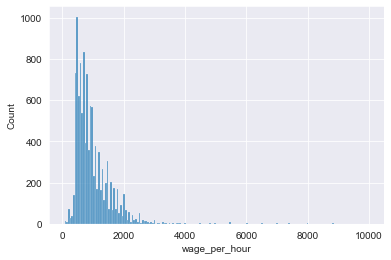

In [6]:
sns.histplot(df.wage_per_hour)
show()

C:\Users\Kacper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


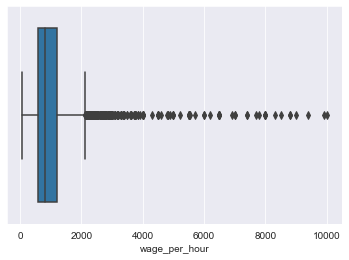

In [7]:
sns.boxplot(df.wage_per_hour)
show()

In [8]:
df['wage_per_hour'].describe()

count    11179.000000
mean       981.048394
std        644.463550
min         75.000000
25%        585.000000
50%        800.000000
75%       1200.000000
max       9999.000000
Name: wage_per_hour, dtype: float64

Mediana intuicyjna wynosi 800 i mówi nam to że dokladnie 50% obserwacji jest powyżej tej wartości (od 800 do 9999) i dokładnie 50% jest w przedziale (do 75 do 800). Średnia wynosi 981.048394 i znajduje się już górnych 50%. Trzeci kwartyl zaczyna się od wartości 1200

In [9]:
df['wage_per_hour'].skew()

4.235185421526145

Rozkład jest asymetryczny; istnieją odstające obserwacje, prawy ogon rozkladu jest znaczenie dłuższy co jedenoznacznie wskazuje na silną asymetrię prawostronną. 

In [10]:
df['lwage'] = np.log(df['wage_per_hour'])

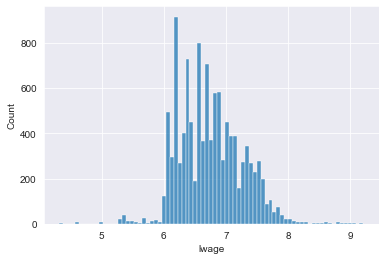

In [11]:
sns.histplot(df.lwage)
show()


C:\Users\Kacper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


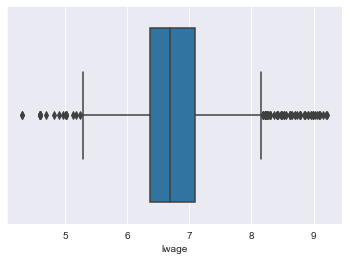

In [12]:
sns.boxplot(df.lwage)
show()

Przekształciliśmy daną zmieną na formę zlogarytmowaną, aby w jakimś stopniu zniwelować asymetrię rozkładu.

In [13]:
df['lwage'].describe()

count    11179.000000
mean         6.745009
std          0.515377
min          4.317488
25%          6.371612
50%          6.684612
75%          7.090077
max          9.210240
Name: lwage, dtype: float64

## Zmienne objaśniające

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11179.0,36.791216,13.109851,15.000000,26.000000,35.000000,46.000000,90.00000
edu_non_grad,11179.0,0.171751,0.377180,0.000000,0.000000,0.000000,0.000000,1.00000
edu_hs_grad,11179.0,0.389659,0.487695,0.000000,0.000000,0.000000,1.000000,1.00000
edu_uni_col_uni_grad,11179.0,0.433491,0.495579,0.000000,0.000000,0.000000,1.000000,1.00000
edu_prof_or_phd_grad,11179.0,0.005099,0.071227,0.000000,0.000000,0.000000,0.000000,1.00000
wage_per_hour,11179.0,981.048394,644.463550,75.000000,585.000000,800.000000,1200.000000,9999.00000
marital_status,11179.0,0.541730,0.498278,0.000000,0.000000,1.000000,1.000000,1.00000
race,11179.0,0.151892,0.358932,0.000000,0.000000,0.000000,0.000000,1.00000
sex,11179.0,0.516236,0.499759,0.000000,0.000000,1.000000,1.000000,1.00000
member_of_labor_union,11179.0,0.173092,0.378344,0.000000,0.000000,0.000000,0.000000,1.00000


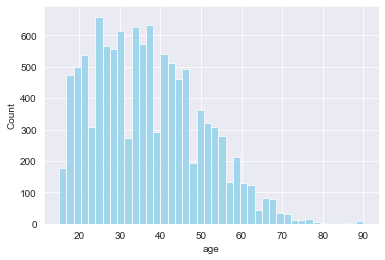

In [15]:
sns.histplot(data=df, x="age",  color="skyblue", )
show()

Mediana wieku w naszej grupie to 35 lat. Średnia to 36,79. Pierwszy, drugi i trzeci kwartyl to odpowiednio 26 35 i 46 maksymalna wartość to 90

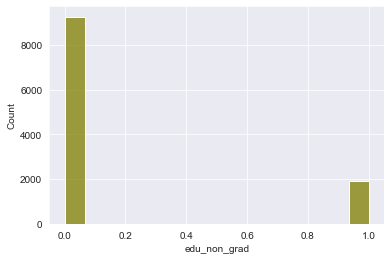

In [16]:
sns.histplot(data=df, x="edu_non_grad", color="olive", )
show()

W naszym zbiorze danych liczba ludzi którzy nie ukończyli 12 klasowego cyklu edukacji wynosi 1920 osób.

In [17]:
sum(df['edu_non_grad']>=1)

1920

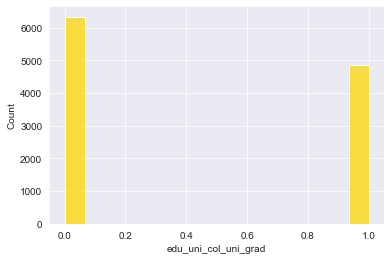

In [18]:
sns.histplot(data=df, x="edu_uni_col_uni_grad", color="gold", )
show()

In [19]:
sum(df['edu_uni_col_uni_grad']>=1)

4846

W naszym zbiorze danych liczba ludzi którzy są na studiach bądź je ukończyli 4846 osób

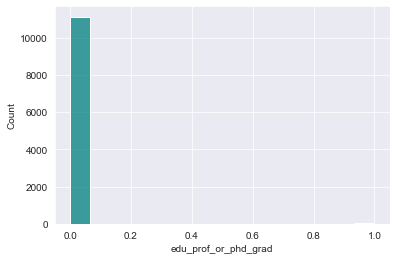

In [20]:
sns.histplot(data=df, x="edu_prof_or_phd_grad", color="teal", )
show()

In [21]:
sum(df['edu_prof_or_phd_grad']>=1)

57

W naszym zbiorze danych liczba ludzi którzy są na studiach doktorskich mają doktorat bądź profesurę bądź je ukończyli 57 osób

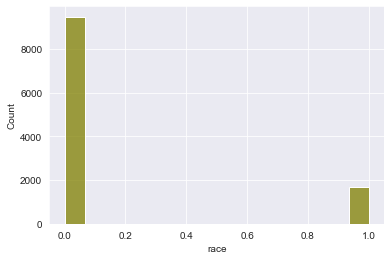

In [22]:
sns.histplot(data=df, x="race",  color="olive", )
show()

In [23]:
sum(df['race']>=1)

1698

W naszym zbiorze mamy 1698 osób rasy innej niż biała

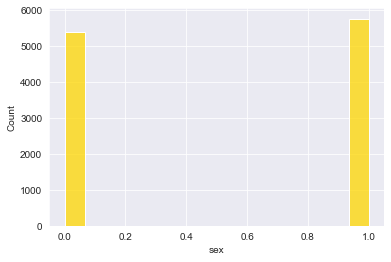

In [24]:
sns.histplot(data=df, x="sex",  color="gold", )
show()

In [25]:
sum(df['sex']>=1)

5771

In [26]:
sum(df['sex']<=0)

5408

W zbiorze mamy 5771 kobiet i 5408 mężczyzn.

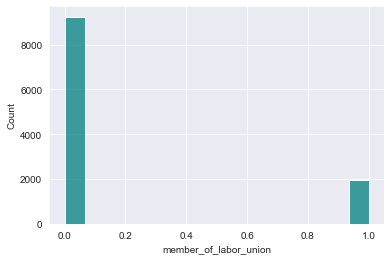

In [27]:
sns.histplot(data=df, x="member_of_labor_union",  color="teal", )
show()

In [28]:
sum(df['member_of_labor_union']>=1)

1935

W zbiorze mamy 1935 członków związków zawodowych

C:\Users\Kacper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


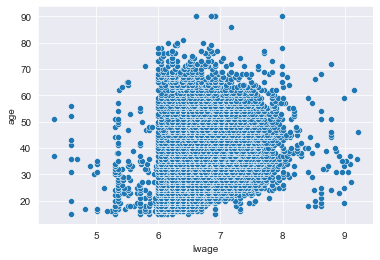

In [29]:
sns.scatterplot(df.lwage, df.age, )
show()

In [30]:
y=df['wage_per_hour']
X=df[['age','edu_non_grad',	'edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','race','sex','member_of_labor_union',]]
X = sm.add_constant(X)

In [31]:
model1 = sm.OLS(y,X).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          wage_per_hour   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     303.6
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:26:54   Log-Likelihood:                -87072.
No. Observations:               11179   AIC:                         1.742e+05
Df Residuals:                   11170   BIC:                         1.742e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   798.6377     21.030     37.977      0.000     757.416     839.860
age                       6.8058      0.456     14.910      0.000       5.911       7.701
edu_non_grad           -309.7518     19.066    -16.246      0.000    -347.125    -272.379
edu_hs_grad            -141.0417     17.689     -7.973      0.000    -175.716    -106.367
edu_uni_col_uni_grad     42.3311     17.453      2.425      0.015       8.120      76.542
edu_prof_or_phd_grad   1207.1002     62.284     19.380      0.000    1085.012    1329.189
marital_status          121.1021     12.005     10.087      0.000      97.569     144.635
race                    -49.7539     15.526     -3.205      0.001     -80.187     -19.320
sex                    -188.6953     11.302    -16.696      0.000    -210.849    -166.542
member_of_labor_union   317.9468     15.101     21.055      0.000     288.346     347.547
==============================================================================
Omnibus:                    11651.486   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1254416.332
Skew:                           5.047   Prob(JB):                         0.00
Kurtosis:                      53.904   Cond. No.                     3.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


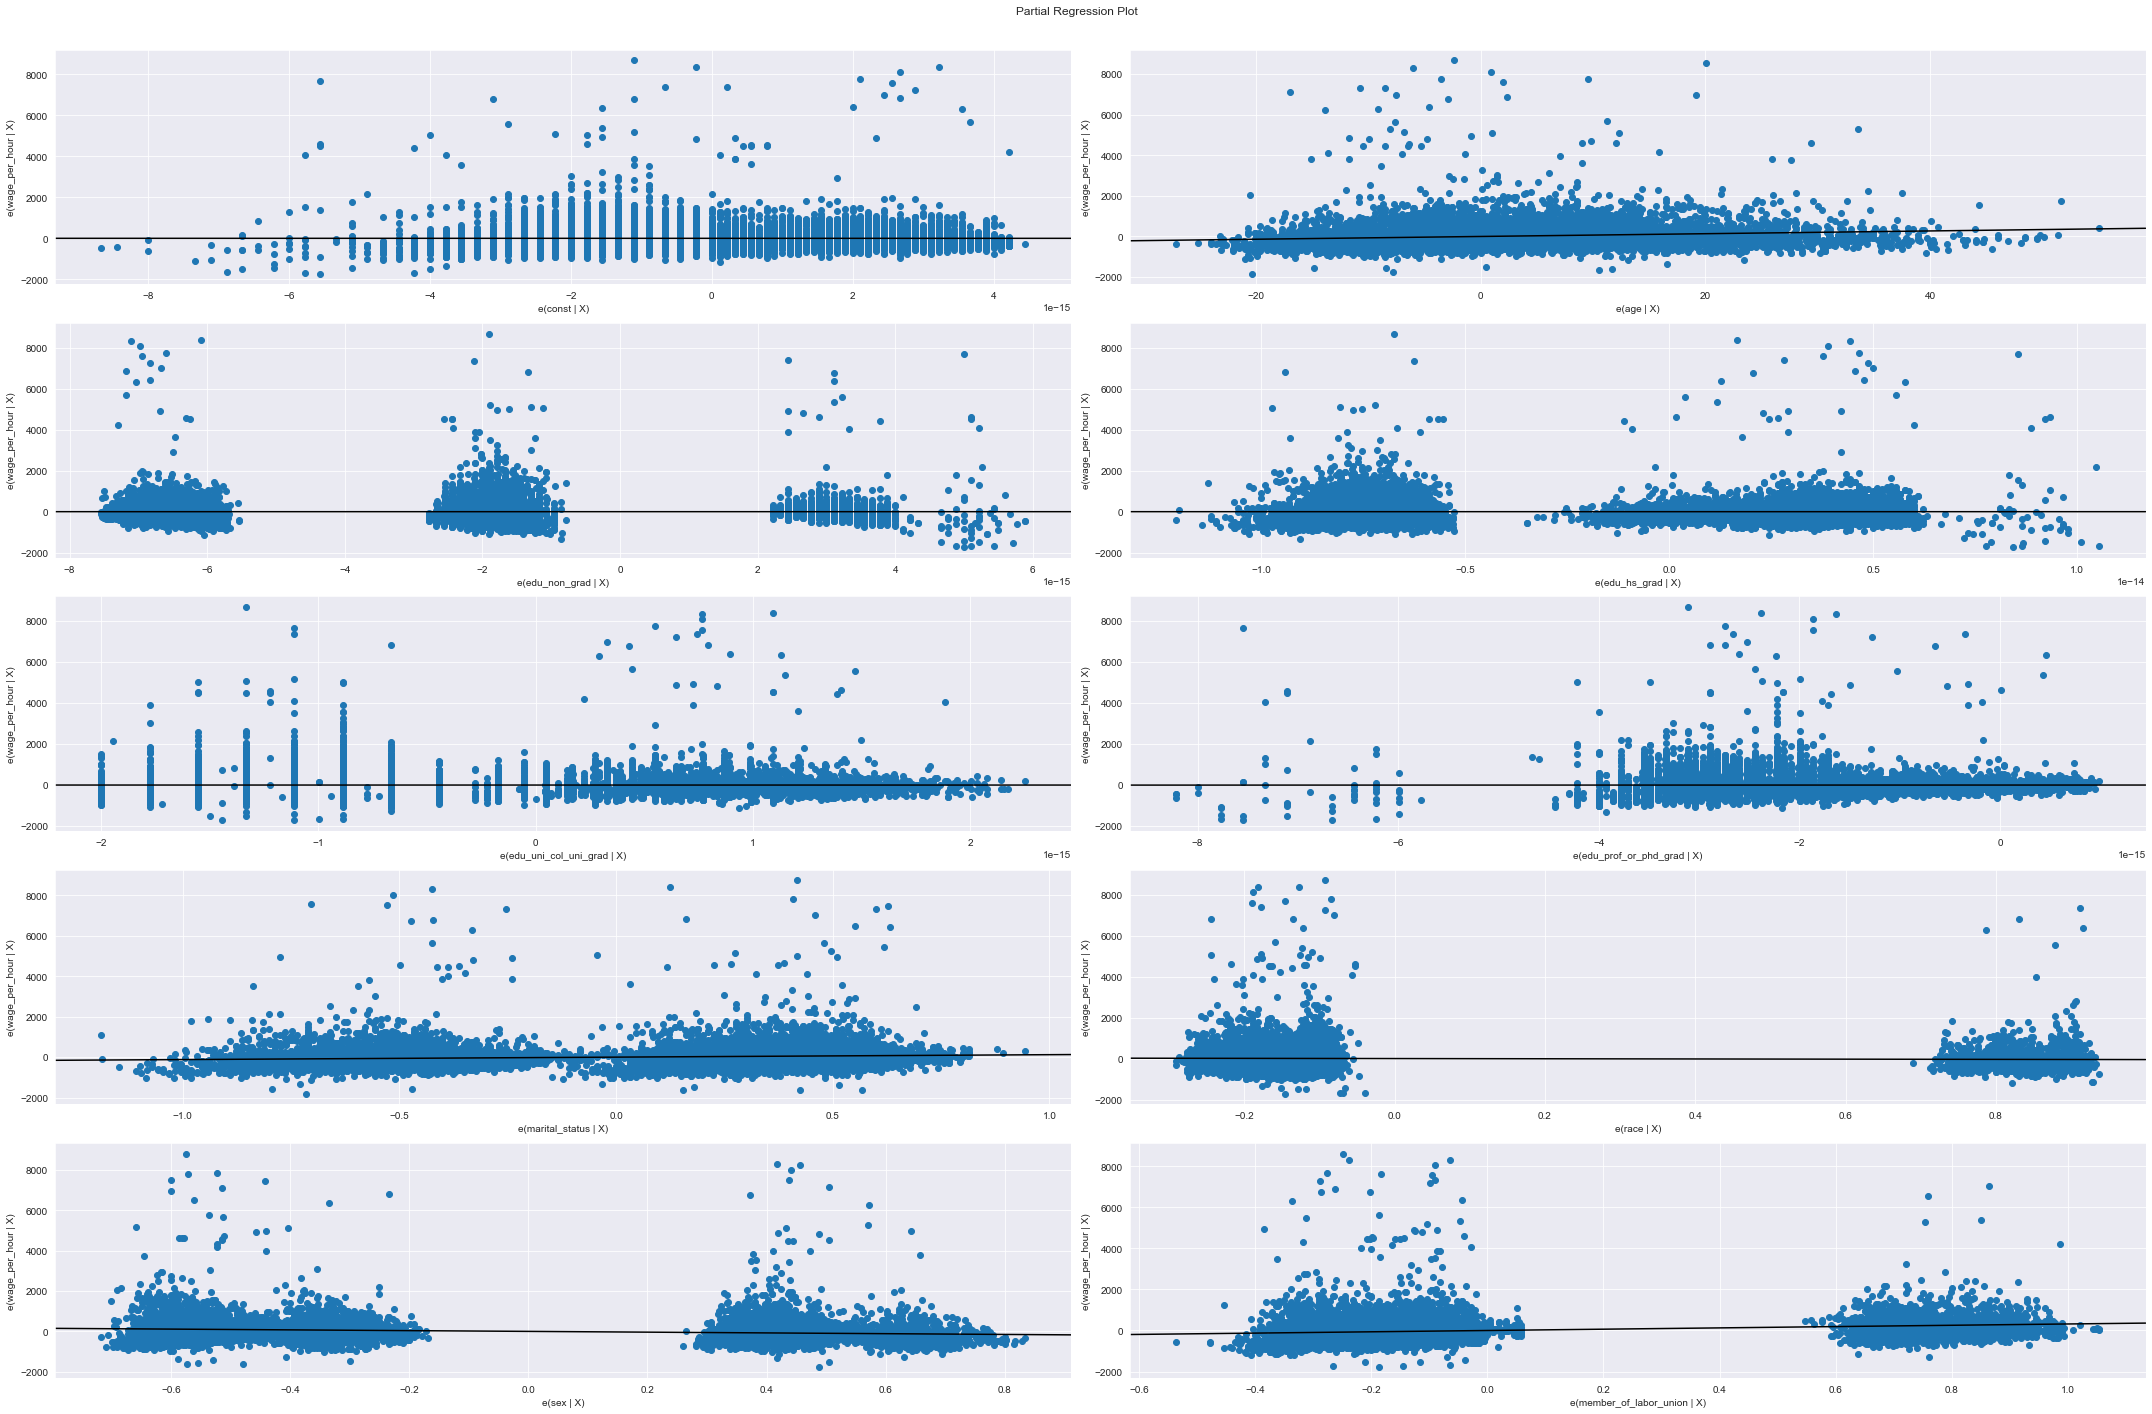

In [32]:
fig = plt.figure(figsize=(30,20))
sm.graphics.plot_partregress_grid(model1,fig=fig)
savefig('partialregplot+1.jpg',dpi=240)
plt.show()

Z naszych zmiennych objaśniacjących tylko age jest zmienną ciągłą, natomiast pozostałe zmienne są zmiennymi binarnymi. Zdecydowaliśmy o dodaniu zmiennej age w przkszatałconej formie podniesionej do kwadratu, ponieważ pozwala na dokładniejsze modelowanie relacji wieku który może mieć nieliniową zależność ze zmienną objaśnianą.

In [33]:
df['age_2']=df['age']**2

In [34]:
y=df['lwage']
X=df[['age','age_2','edu_non_grad',	'edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','race','sex','member_of_labor_union',]]
X = sm.add_constant(X)

In [35]:
model2= sm.OLS(y,X).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     550.0
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:26:59   Log-Likelihood:                -6401.2
No. Observations:               11179   AIC:                         1.282e+04
Df Residuals:                   11169   BIC:                         1.290e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.6850      0.028    165.182      0.000       4.629       4.741
age                       0.0508      0.002     28.676      0.000       0.047       0.054
age_2                    -0.0005   2.11e-05    -25.088      0.000      -0.001      -0.000
edu_non_grad              0.8285      0.015     56.828      0.000       0.800       0.857
edu_hs_grad               0.9733      0.015     67.047      0.000       0.945       1.002
edu_uni_col_uni_grad      1.1287      0.014     78.469      0.000       1.101       1.157
edu_prof_or_phd_grad      1.7545      0.046     37.940      0.000       1.664       1.845
marital_status            0.0731      0.009      7.975      0.000       0.055       0.091
race                     -0.0628      0.011     -5.491      0.000      -0.085      -0.040
sex                      -0.1897      0.008    -22.845      0.000      -0.206      -0.173
member_of_labor_union     0.2862      0.011     25.647      0.000       0.264       0.308
==============================================================================
Omnibus:                      955.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4181.579
Skew:                           0.320   Prob(JB):                         0.00
Kurtosis:                       5.927   Cond. No.                     1.28e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


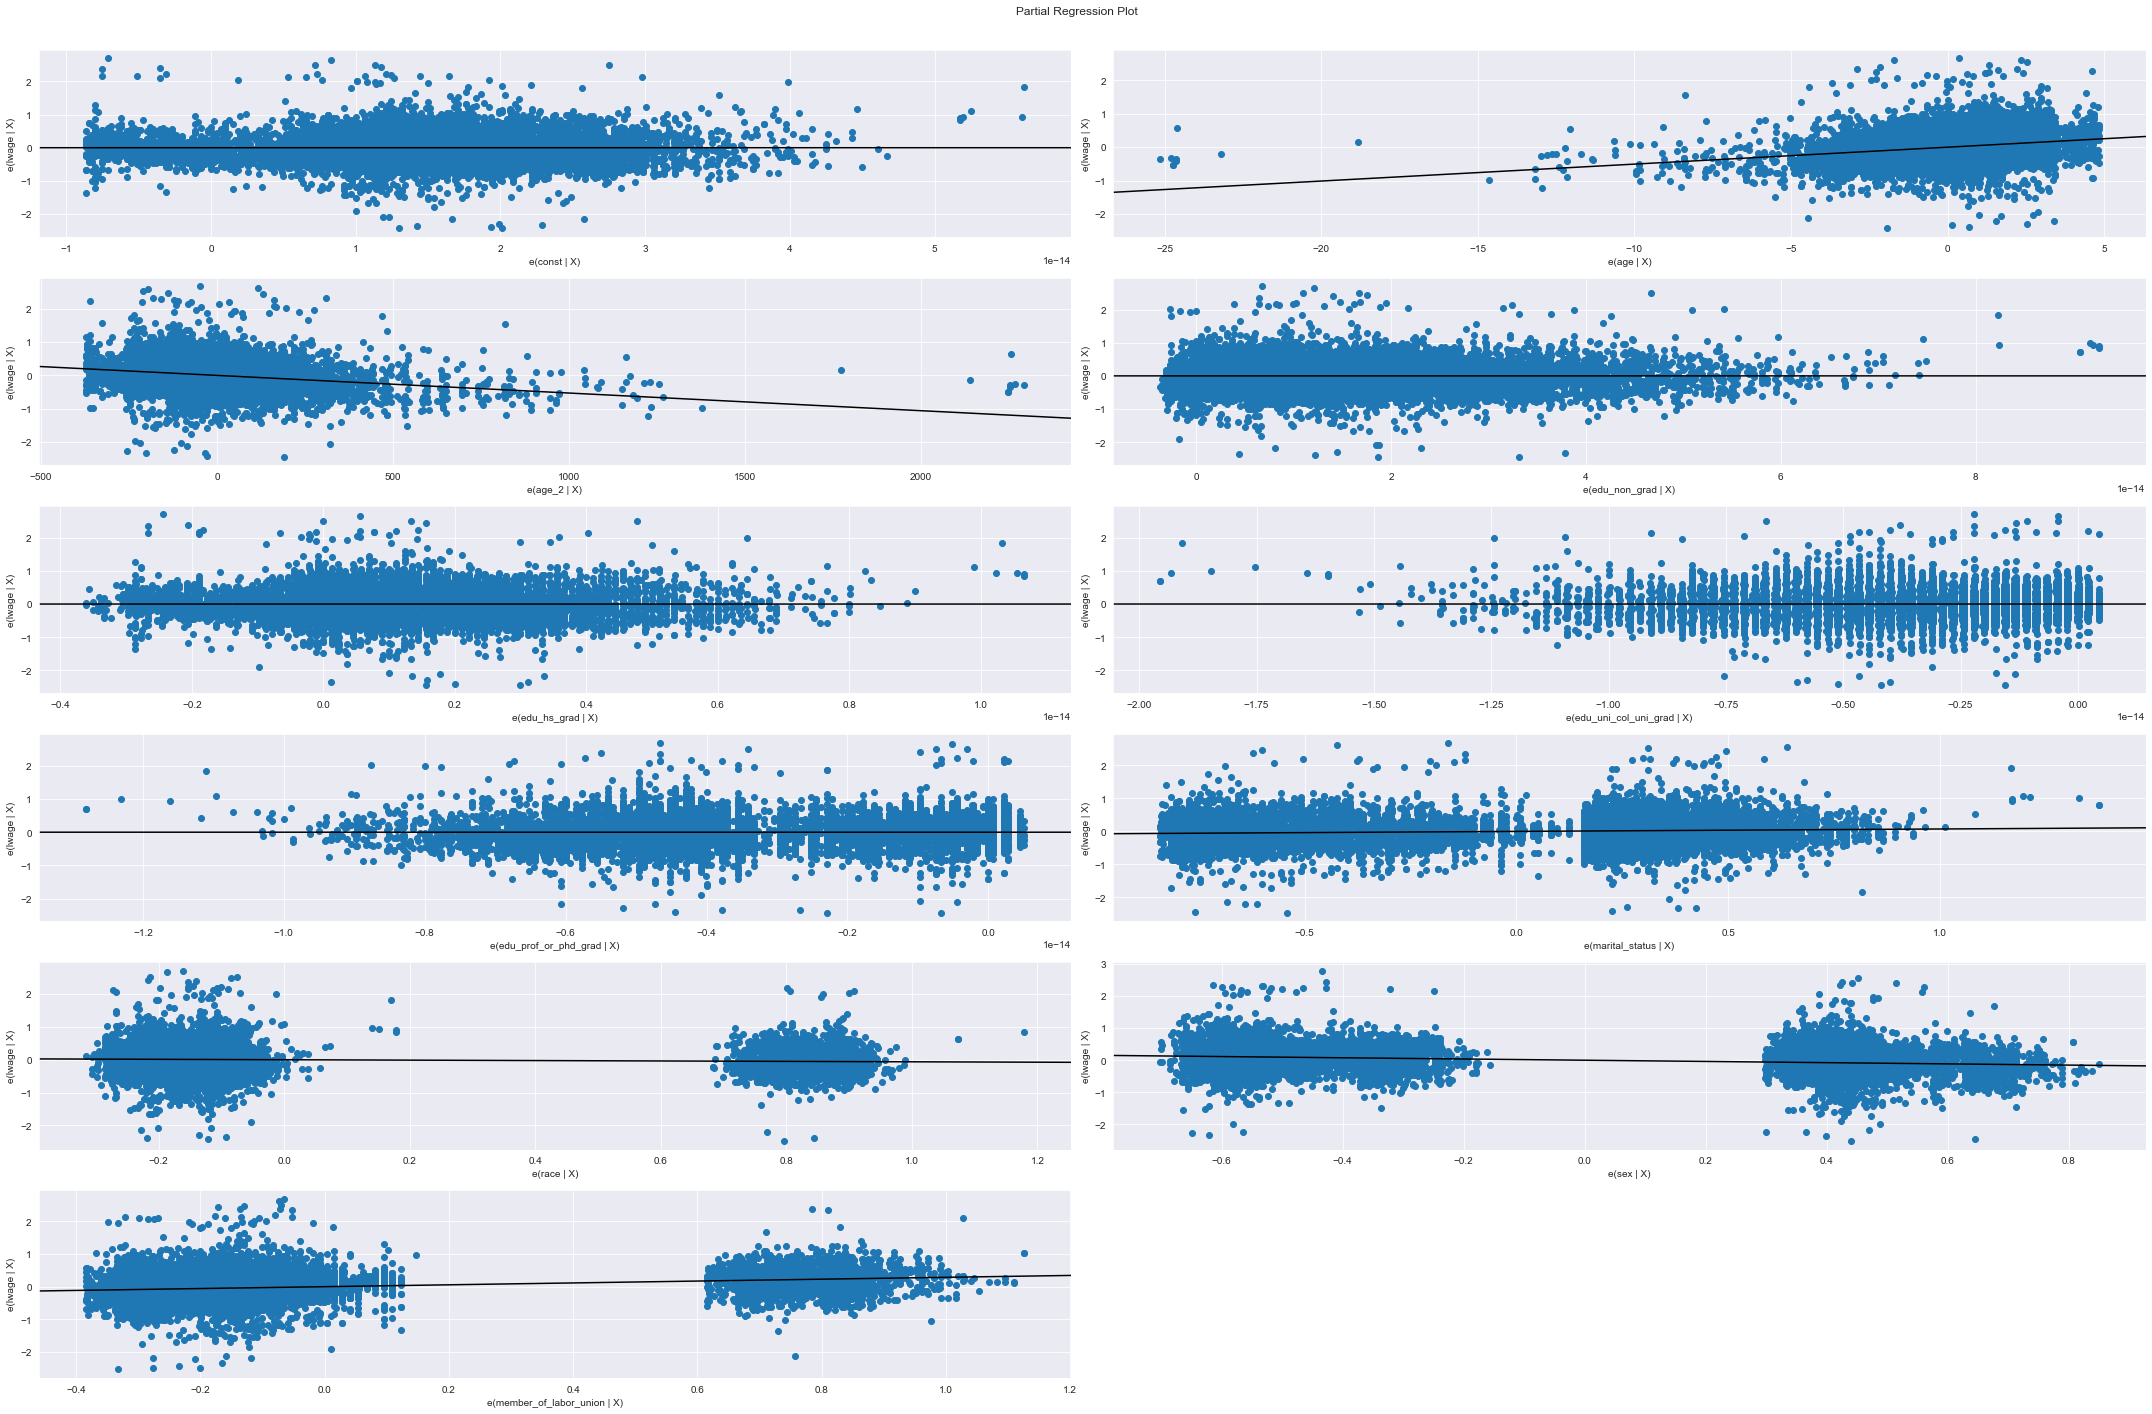

In [36]:
fig = plt.figure(figsize=(30,20))
sm.graphics.plot_partregress_grid(model2,fig=fig)
savefig('partialregplot+2.jpg',dpi=240)
plt.show()

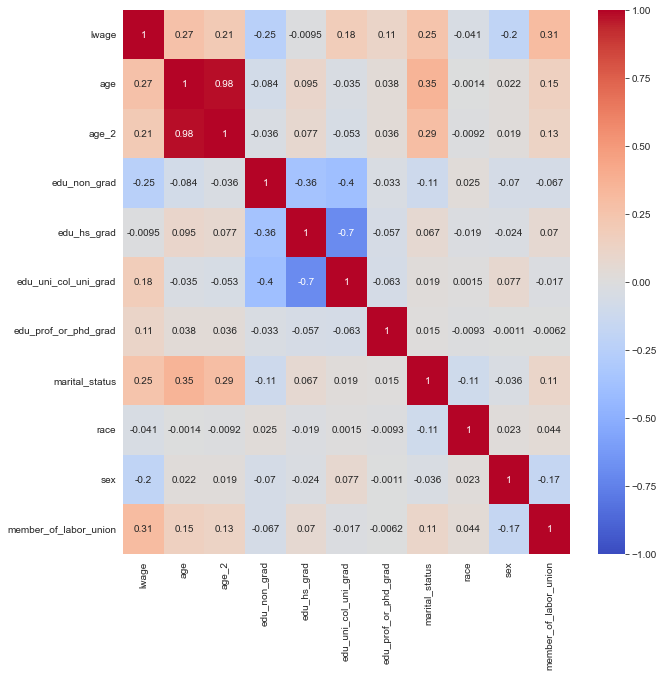

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['lwage','age','age_2','edu_non_grad','edu_hs_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','race','sex','member_of_labor_union',]].corr(method = 'pearson'), vmin = -1, vmax = 1, annot = True,cmap = 'coolwarm')
savefig('heatmap.jpg')
show()

Na podstawie niskiej korelacji z lwage zdecydowaliśmy się usunąć z modelu edu_hs_grad. 

In [38]:
y=df['lwage']
X=df[['age','age_2','edu_non_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','member_of_labor_union','race','sex']]
X = sm.add_constant(X)

In [39]:
model3 = sm.OLS(y,X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     550.0
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:27:04   Log-Likelihood:                -6401.2
No. Observations:               11179   AIC:                         1.282e+04
Df Residuals:                   11169   BIC:                         1.290e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.6583      0.033    169.061      0.000       5.593       5.724
age                       0.0508      0.002     28.676      0.000       0.047       0.054
age_2                    -0.0005   2.11e-05    -25.088      0.000      -0.001      -0.000
edu_non_grad             -0.1448      0.012    -11.913      0.000      -0.169      -0.121
edu_uni_col_uni_grad      0.1555      0.009     17.270      0.000       0.138       0.173
edu_prof_or_phd_grad      0.7812      0.057     13.645      0.000       0.669       0.893
marital_status            0.0731      0.009      7.975      0.000       0.055       0.091
member_of_labor_union     0.2862      0.011     25.647      0.000       0.264       0.308
race                     -0.0628      0.011     -5.491      0.000      -0.085      -0.040
sex                      -0.1897      0.008    -22.845      0.000      -0.206      -0.173
==============================================================================
Omnibus:                      955.402   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4181.579
Skew:                           0.320   Prob(JB):                         0.00
Kurtosis:                       5.927   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
Stargazer([model1,model2,model3])

Podejmujemy decyzję o wykorzystaniu interakcji łączących rasę oraz płeć z różnymi poziomami wykształcenia.

In [41]:
df['raceXedu_non_grad']=df['race']*df['edu_non_grad']
df['raceXedu_prof_or_phd_grad']=df['race']*df['edu_prof_or_phd_grad']
df['raceXedu_uni_col_uni_grad']=df['race']*df['edu_uni_col_uni_grad']

In [42]:
df['sexXedu_non_grad']=df['sex']*df['edu_non_grad']
df['sexXedu_prof_or_phd_grad']=df['sex']*df['edu_prof_or_phd_grad']
df['sexXedu_uni_col_uni_grad']=df['sex']*df['edu_uni_col_uni_grad']

In [43]:
y=df['lwage']
X=df[['age','age_2','edu_non_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','member_of_labor_union','sex','race','raceXedu_non_grad','raceXedu_prof_or_phd_grad','raceXedu_uni_col_uni_grad','sexXedu_uni_col_uni_grad','sexXedu_prof_or_phd_grad','sexXedu_non_grad']]
X= sm.add_constant(X)

In [44]:
model8=sm.OLS(y,X).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     337.0
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:27:04   Log-Likelihood:                -6363.7
No. Observations:               11179   AIC:                         1.276e+04
Df Residuals:                   11163   BIC:                         1.288e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.7007      0.034    168.724      0.000       5.635       5.767
age                           0.0509      0.002     28.822      0.000       0.047       0.054
age_2                        -0.0005   2.11e-05    -25.169      0.000      -0.001      -0.000
edu_non_grad                 -0.2034      0.017    -11.997      0.000      -0.237      -0.170
edu_uni_col_uni_grad          0.0697      0.014      5.149      0.000       0.043       0.096
edu_prof_or_phd_grad          0.7682      0.083      9.301      0.000       0.606       0.930
marital_status                0.0728      0.009      7.963      0.000       0.055       0.091
member_of_labor_union         0.2819      0.011     25.286      0.000       0.260       0.304
sex                          -0.2693      0.013    -20.476      0.000      -0.295      -0.243
race                         -0.1084      0.019     -5.828      0.000      -0.145      -0.072
raceXedu_non_grad             0.0548      0.032      1.716      0.086      -0.008       0.117
raceXedu_prof_or_phd_grad    -0.0988      0.187     -0.529      0.597      -0.465       0.267
raceXedu_uni_col_uni_grad     0.0796      0.025      3.157      0.002       0.030       0.129
sexXedu_uni_col_uni_grad      0.1407      0.018      7.831      0.000       0.105       0.176
sexXedu_prof_or_phd_grad      0.0421      0.115      0.367      0.714      -0.183       0.267
sexXedu_non_grad              0.1041      0.024      4.405      0.000       0.058       0.150
==============================================================================
Omnibus:                      975.340   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4372.334
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                       5.995   Cond. No.                     8.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
Stargazer([model1,model2,model3,model8])

Usuwamy zmienne nieistotne statystycznie.

In [46]:
y=df['lwage']
X=df[['age','age_2','edu_non_grad','edu_uni_col_uni_grad','edu_prof_or_phd_grad','marital_status','member_of_labor_union','sex','race','raceXedu_uni_col_uni_grad','sexXedu_uni_col_uni_grad','sexXedu_non_grad']]
X= sm.add_constant(X)

In [47]:
model9=sm.OLS(y,X).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     421.0
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:27:04   Log-Likelihood:                -6365.4
No. Observations:               11179   AIC:                         1.276e+04
Df Residuals:                   11166   BIC:                         1.285e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.6959      0.034    169.212      0.000       5.630       5.762
age                           0.0510      0.002     28.890      0.000       0.048       0.054
age_2                        -0.0005   2.11e-05    -25.226      0.000      -0.001      -0.000
edu_non_grad                 -0.1946      0.016    -12.024      0.000      -0.226      -0.163
edu_uni_col_uni_grad          0.0724      0.013      5.395      0.000       0.046       0.099
edu_prof_or_phd_grad          0.7798      0.057     13.662      0.000       0.668       0.892
marital_status                0.0730      0.009      7.982      0.000       0.055       0.091
member_of_labor_union         0.2818      0.011     25.286      0.000       0.260       0.304
sex                          -0.2689      0.013    -20.593      0.000      -0.295      -0.243
race                         -0.0907      0.015     -6.000      0.000      -0.120      -0.061
raceXedu_uni_col_uni_grad     0.0618      0.023      2.716      0.007       0.017       0.106
sexXedu_uni_col_uni_grad      0.1404      0.018      7.842      0.000       0.105       0.175
sexXedu_non_grad              0.1047      0.024      4.441      0.000       0.059       0.151
==============================================================================
Omnibus:                      973.884   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4359.813
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                       5.991   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p − value > α brak podstaw do odrzucenia hipotezy zerowej

p − value ≤ α odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej

Testujemy hipotezę zerową o łącznej nieistotności zmiennych objaśniających. Hipoteza alternatywna - prznajmniej jedna jest istotna statystycznie.

Otrzymane p-value=0 dla statystyki F z rozkładu czyli przynajmniej jedna zmienna objaśniająca jest istotna statystycznie. 

Otrzymane p-value=<0.01 dla statystyki T dla wsystkich zmiennych co powoduje że wszystkie zmienne są istotne statystycznie na poziomie 1%. 

Zmienne są łącznie istotne.

In [48]:
Stargazer([model1,model2,model3,model9])

Według nas po przekształceniu, po dodaniu kilku interakcji i porównaniu statystyk R^2 i Adj R^2 podejmujemy decyzję o wykorzystaniu modelu 4

## Ostateczna forma strukturalna modelu.

$\hat{lwage} = 5.6959+ 0.0510\:\hat{age}-0.0005\:\hat{age^2}-0.1946\:\hat{edu\:non\:grad}+0.0724\:\hat{edu\:uni\:col\:uni\:grad}+0.7798\:\hat{edu\: prof\: or\: phd \:grad}+0.0730 \:\hat{marital\: status}+0.2818 \:\hat{member\: of \:labor\: union}-0.2689 \:\hat{sex}-0.0907 \:\hat{race}+ 0.0618 \:\hat{raceXedu\:uni\:col\:uni\:grad}+0.1404\:\hat{sexXedu\:uni\:col\:uni\:grad}+0.1047\hat{sexXedu\:non\:grad}+\epsilon_i$



## 

## Semielastyczności (wyniki są pomnożone *100)

In [49]:
(sp.exp(0.051)-1)*100

5.23228932832038

Oczekujemy, że wzrost wieku o 1 rok przekłada się na wzrost płac o 5,23% ceteris paribus. 


In [50]:
(sp.exp(-0.0005)-1)*100

-0.0499875020830709

Mając jednocześnie negatywną relację wieku podniesionego do kwadratu z płacą, oczekujemy, że wraz z wiekiem, efekt age jest coraz mniejszy (o 0,0499%) ceteris paribus. 


In [51]:
(sp.exp(-0.0907)-1)*100

-8.67083426975586

Oczekujemy, że osoby rasy innej niż biała z wykształceniem niższym niż wyższe mają płacę mniejszą o 8,67% w porównaniu z osobami rasy białej z wykształceniem niższym niż wyższe, ceteris paribus. 

In [52]:
(sp.exp(0.2818)-1)*100

32.5513590756601

Oczekujemy, że osoby w związku zawodowym posiadają płacę większą o 32,55% w porównaniu z osobami, którzy nie są w tego typu związku, ceteris paribus. 

In [53]:
(sp.exp(-0.1946)-1)*100

-17.6836142245209

Oczekujemy że mężczyźni bez zakończonego etapu edukacji będą zarabiały o 17,68% mniej w porówniu z mężczyźni z ukończonym cyklem 12 klasowym.

In [54]:
(sp.exp(0.0724)-1)*100

7.50852921853309

Oczekujemy że biali mężczyźni w trakcie studiów bądź po studiach będą zarabiali o 7,5% więcej w porówniu do białych mężczyzn z niższym poziomem formalnego wykształcenia

In [55]:
(sp.exp(0.7798)-1)*100

118.103601467164

Oczekujemy że osoby w trakcie doktoratu bądź po uzyskaniu doktoratu bądź profesury będą zarabiały o 118,10% więcej w porówniu do osób z niższym poziomem formalnego wykształcenia

In [56]:
(sp.exp(0.0730)-1)*100

7.57305369147034

Oczekujemy, że osoby będący w związku małżeńskim zarabiają więcej o 7,57% w porównaniu z osobami niebędącymi w tego typu związku, ceteris paribus.

In [57]:
sp.exp(-0.2689+0.1404)*100

87.9413562418416

Oczekujemy, że kobiety które są w trakcie studiów lub ukończyły studia zarabiają więcej o 87,94% w porównaniu do mężczyzn na tym samym poziomie wykształcenia

In [58]:
(sp.exp(-0.0907+0.0618 )-1)*100

-2.84863890297042

Oczekujemy, że osoby rasy innej niz biała w trakcie studiów lub po ukończeniu ich będą zarabiali mniej o 2,84% w porównaniu do białych na tym samym poziomie wykształcenia

In [59]:
(sp.exp(-0.2689+0.1047)-1)*100

-15.1427709550460

Oczekujemy, że kobiety bez ukończonego 12 klasowego cyklu zarabiają mniej o 15,14% w porównaniu do mężczyzn na tym samy poziomie wykształcenia

## Ocena jakości uzyskanego modelu

R^2 naszego modelu wynosi 0.312 co oznacza że 31,2% naszej zmiennej objaśnianej lwage(logarytm dochodu za godzinę) jest wyjaśnionych przez łaczną zmienność wszystkich zmiennych objaśniających a 68,8% zmienności jest nie wyjaśnione.


## Weryfikacja Hipotez badawczych wskazanych w case study nr 1

Hipoteza 1: wiek do pewnego momentu wpływa dodatnio na wzrost dochodów


Odpowiedź: Przedstawiona wyżej interpretacja zmiennych age i age^2 oznacza, że wraz z wiekiem mamy coraz większe dochody jednakże poziom wzrostu będzie słabnął co jest zgodne z naszą hipotezą.

Hipoteza 2: bycie kobietą negatywnie wpływa na dochody w porównaniu do podobnie  wykształconych mężczyzn 

Odpowiedź: W przypadku ukończonych studiów bądź w trakcie studiów dochody kobiet są wyższe od dochodów podobnie wykształconych mężczyn co jest sprzeczne z naszą hipotezą, natomiat w przypadku nieukończonego 12 klasowego cyklu dochody kobiet są wyższe od dochodów podobnie wykształconych mężczyn, co jest zgodne z naszą hipotezą a więc efekt jest niejednoznaczny

Hipoteza 3: bycie białym człowiekiem pozytywnie wpływa na dochody w porównaniu  do podobnie wykształconych ludzi innych ras 

Odpowiedź: W przypadku ukończonych studiów i w trakcie studiów dochody osób innej rasy niż biała są niższe od dochodów ludzi rasy białej o tym samym poziomie wykształcenia; co jest zgodne z naszą hipotezą

Hipoteza 4: pracownicy zrzeszeni w związkach zawodowych zarabiają więcej w  porównaniu do pracowników, którzy nie są w związkach zawodowych

Odpowiedź: W przypadku osób zrzeszonych w związkach zawodowych ich dochody są wyższe mniej wiecej o 1/3

In [62]:
df.to_csv('income2wampoprzeksztalceniach.csv', sep=';')